<a href="https://colab.research.google.com/github/gustavo-sorrilha/Individual-Project/blob/main/Aula_17_Introdu%C3%A7%C3%A3o_ao_Aprendizado_Supervisionado_Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 17 - Introdução ao Aprendizado Supervisionado: Classificação

Nesta aula vamos estudar o uso de algoritmos de **Aprendizado de Máquina Supervisionado**. Focaremos nos algoritmos utilizados para **classificação**, que é a tarefa de predizer classes (rótulos categóricos) para conjuntos de dados (numéricos ou transformados em numéricos).

Existem muitos algoritmos para se realizar essa tarefa, entre eles:
- Regressão Logística
- Análise de Discriminante Linear (LDA)
- Análise de Discriminante Quadrático (QDA)
- Naive Bayes
- k-vizinhos mais próximos (KNN)
- Máquina de Vetor Suporte (SVM)
- Árvore de Decisão
- RandomForest

Cada uma dessas técnicas tem uma forte base matemática e conceitual. Os algoritmos foram propostos ao longo de diversas décadas e possuem diferentes cenários de aplicações. Não teremos tempo de ver cada um deles a fundo, nem mesmo todos eles. Iremos nos focar nos procedimentos básicos para se utilizar esses algoritmos.

--------------------------

## Exemplo 1 - Entomologia: Gafanhatos vs Esperanças

![image-2.png](attachment:image-2.png)

Foram medidos o comprimento das antenas e do abdômen de dois tipos de insetos: gafanhotos e esperanças. 

Trabalhamos com estes dados na aula 16. Agora iremos aprender a criar classificadores para eles

### Exemplo 1 - Primeiro passo: carregar os dados e fazer Análise Exploratória

Como já fizemos a Análise Exploratória com esses dados na outras aulas, iremos pular essa etapa.

In [ ]:
# Para trabalhar com dados em tabelas
import pandas as pd

# Para trabalhar com gráficos
import matplotlib.pyplot as plt  
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Formulário.csv to Formulário.csv


In [ ]:
dados = pd.read_csv('Formulário.csv') 

In [ ]:
dados.head()

,Carimbo de data/hora,Endereço de e-mail,Qual seu nome?,Qual a sua faixa etária?,Qual seu nível de conhecimento sobre o mercado financeiro?,"E sobre Oferta Pública Inicial (ou IPO), qual seu nível de conhecimento?\n",Você teria interesse em fazer um curso dinâmico gratuito sobre IPO?,Qual forma de aprender você acha melhor?,"De 0 a 5, quão satisfeito você ficaria se recebesse uma ação de um IPO (gratuitamente) após o término do curso?","De 0 a 5, quão satisfeito você ficaria se tivesse que abrir a conta em uma corretora para receber esta ação de IPO?","Se ganhasse essa ação de um IPO, você provavelmente:",Você indicaria este curso para outras pessoas?,Unnamed: 12
0,26/09/2022 22:28:00,felipemerlo08@gmail.com,Felipe Merlo,De 18 a 25 anos.,Intermediário (Acompanho e invisto frequenteme...,Básico (Tenho pouco conhecimento),Sim,Vídeo Aulas,5,2,Manteria a ação a médio / longo prazo,Sim,1.0
1,28/09/2022 19:23:10,gegeasy@gmail.com,Gustavo,De 18 a 25 anos.,Básico (Tenho pouco conhecimento mas não acomp...,Básico (Tenho pouco conhecimento),Talvez,Em formato de jogo,4,1,Buscaria mais conhecimento e compraria mais ações,Talvez,1.0
2,29/09/2022 11:11:52,NaN,Kaue Caponero Figueiredo,De 26 a 35 anos.,Intermediário (Acompanho e invisto frequenteme...,Intermediário (Acompanho frequentemente),Sim,Vídeo Aulas,5,4,Buscaria mais conhecimento e compraria mais ações,Sim,1.0
3,29/09/2022 11:11:55,NaN,Henrique Rodrigues Segura,De 18 a 25 anos.,Básico (Tenho pouco conhecimento mas não acomp...,Básico (Tenho pouco conhecimento),Sim,Vídeo Aulas,5,4,Buscaria mais conhecimento e compraria mais ações,Sim,1.0
4,29/09/2022 11:14:25,NaN,Luiz Felipe Gadelha Melo,De 26 a 35 anos.,Básico (Tenho pouco conhecimento mas não acomp...,Básico (Tenho pouco conhecimento),Talvez,Vídeo Aulas,5,3,Manteria a ação a médio / longo prazo,Sim,1.0


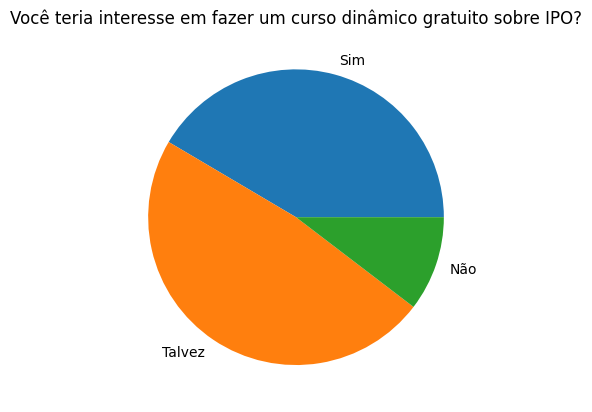

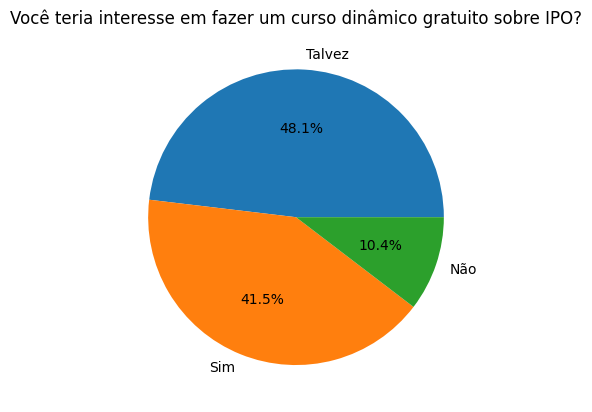

In [ ]:
#Gráfico de Pizza - Faixa Etária
dados['faixa_etaria_num'] = dados['Você teria interesse em fazer um curso dinâmico gratuito sobre IPO?'].replace({
    'Sim': 1,
    'Talvez': 2,
    'Não': 3,
})

labels = ['Sim', 'Talvez', 'Não',]
plt.pie(dados.groupby('faixa_etaria_num').size(), labels=labels)
plt.title('Você teria interesse em fazer um curso dinâmico gratuito sobre IPO?')
plt.show()

faixas_etarias_ord = dados['Você teria interesse em fazer um curso dinâmico gratuito sobre IPO?'].value_counts().index.tolist()
plt.title('Você teria interesse em fazer um curso dinâmico gratuito sobre IPO?')
plt.pie(dados['Você teria interesse em fazer um curso dinâmico gratuito sobre IPO?'].value_counts(),
        labels=faixas_etarias_ord,
        autopct='%1.1f%%')
plt.show()

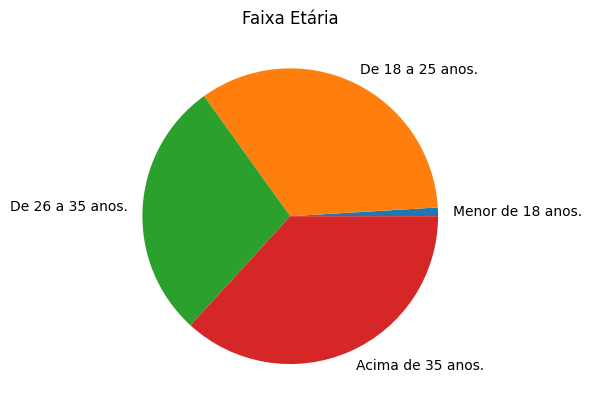

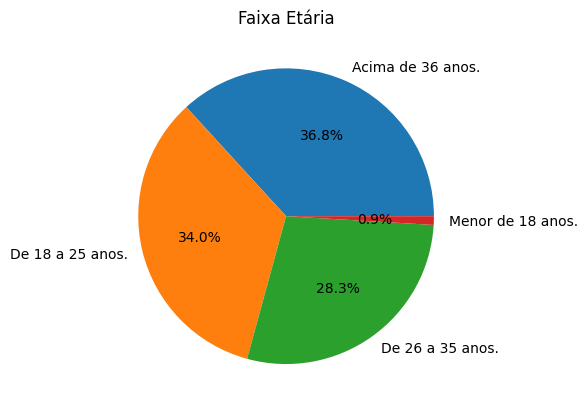

In [ ]:
#Gráfico de Pizza - Faixa Etária
dados['faixa_etaria_num'] = dados['Qual a sua faixa etária?'].replace({
    'Menor de 18 anos.': 1,
    'De 18 a 25 anos.': 2,
    'De 26 a 35 anos.': 3,
    'Acima de 35 anos.': 4
})

labels = ['Menor de 18 anos.', 'De 18 a 25 anos.', 'De 26 a 35 anos.', 'Acima de 35 anos.']
plt.pie(dados.groupby('faixa_etaria_num').size(), labels=labels)
plt.title('Faixa Etária')
plt.show()

faixas_etarias_ord = dados['Qual a sua faixa etária?'].value_counts().index.tolist()
plt.title('Faixa Etária')

plt.pie(dados['Qual a sua faixa etária?'].value_counts(),
        labels=faixas_etarias_ord,
        autopct='%1.1f%%')
plt.show()




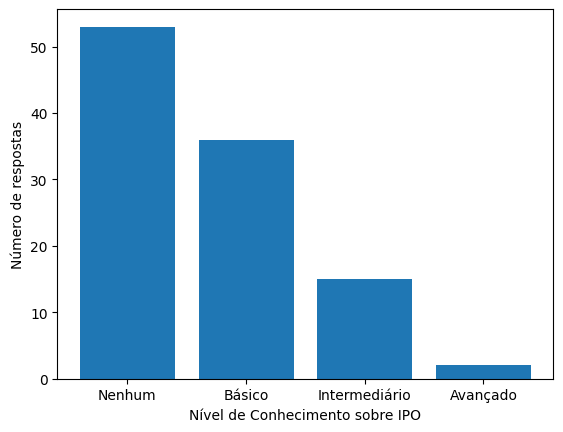

In [ ]:
dados['faixa_etaria_num'] = dados['E sobre Oferta Pública Inicial (ou IPO), qual seu nível de conhecimento?\n'].replace({
    'Nenhum (Nunca ouvi falar)': 1,
    'Básico (Tenho pouco conhecimento)': 2,
    'Intermediário (Acompanho frequentemente)': 3,
    'Avançado (Domino o IPO)': 4
})

faixa_etaria_counts = dados.groupby('faixa_etaria_num').size()

faixas = ['Nenhum', 'Básico', 'Intermediário', 'Avançado']

plt.bar(faixas, faixa_etaria_counts)

plt.xlabel('Nível de Conhecimento sobre IPO')
plt.ylabel('Número de respostas')

plt.show()


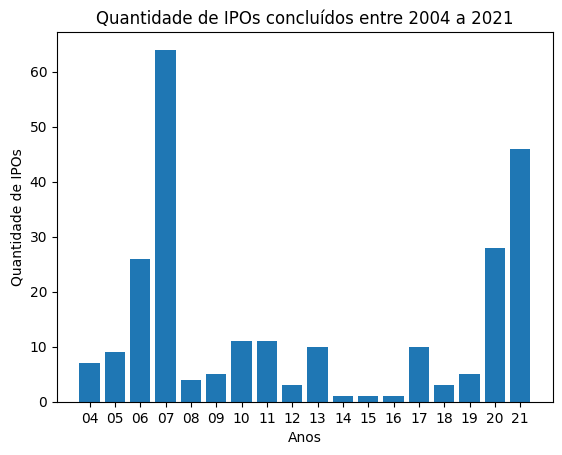

In [ ]:
anos = ['04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21']
ipos = [7, 9, 26, 64, 4, 5, 11, 11, 3, 10, 1, 1, 1, 10, 3, 5, 28, 46]

plt.bar(anos, ipos)

plt.title('Quantidade de IPOs concluídos entre 2004 a 2021')

plt.xlabel('Anos')
plt.ylabel('Quantidade de IPOs')

plt.show()

#*Fonte: Ártica Investimentos, Insper e B3


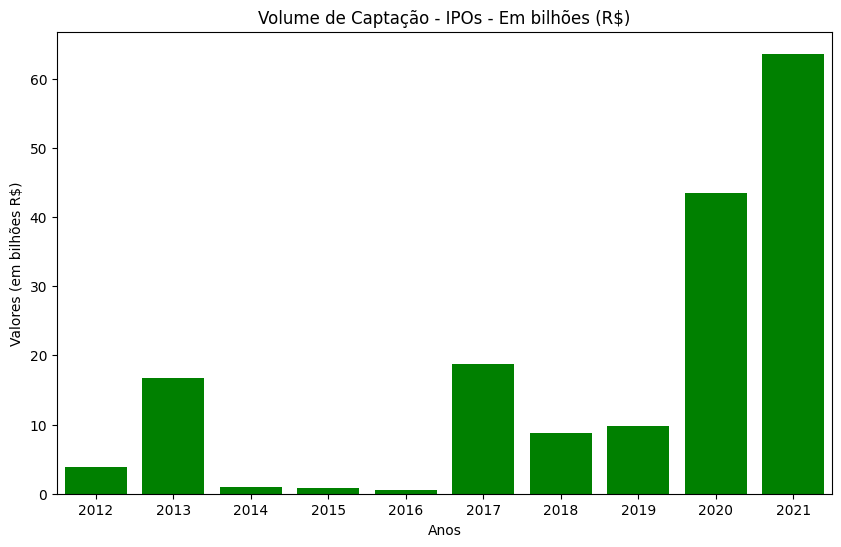

In [ ]:
anos = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
valores = [3.9, 16.7, 0.9, 0.8, 0.6, 18.7, 8.8, 9.8, 43.4, 63.6]

plt.figure(figsize=(10, 6))
plt.title('Volume de Captação - IPOs - Em bilhões (R$)')

plt.bar(anos, valores, color=[ 'green'])

plt.xlabel('Anos')
plt.ylabel('Valores (em bilhões R$)')
plt.xlim(min(anos), max(anos))
plt.xticks(anos)

plt.subplots_adjust(wspace=5)
plt.xlim(min(anos)-0.5, max(anos)+0.5)

plt.show()

#Fonte: Anbima

### Exemplo 1 - Segundo passo: separar os dados

Precisamos ter claro em nossas mentes quais são os atributos (colunas) preditivas, isto é, aquelas que usaremos para predizer um atributo alvo (coluna alvo). No nosso caso os **atributos preditivos são Comprimento do Abdômen e Comprimento das Antenas**, e o **atributo alvo é a Espécie** que será predita.

Quando se trabalhar com Aprendizado de Máquina Supervisionado, além disso precisamos separar nossos dados em dois conjuntos: um **conjunto de treinamento** e um **conjunto de teste**. Fazemos isso para evitar overfitting do algoritmo.

Existem várias estratégias para se separar dados. Vamos aplicar as principais:

(a) Escolher o tamanho dos conjuntos - 80% para treinamento e 20% para teste;

(b) Selecionar aleatoriamente os dados que irão compor o conjunto de treinamento e teste (usando um seed para garantir reprodutibilidade);

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Escolhendo as colunas preditivas e alvo
x = dados.drop(columns = 'Qual a sua faixa etária?') # Somente Comprimento do Abdômen e Comprimento das Antenas
y = dados['Qual a sua faixa etária?']                # Classe alvo

# Dividindo conjunto de treinamento e conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
x_train.head(5)

In [ ]:
y_train.head(5)

62     De 26 a 35 anos.
26     De 18 a 25 anos.
22    Acima de 36 anos.
31     De 26 a 35 anos.
45    Acima de 36 anos.
Name: Qual a sua faixa etária?, dtype: object

### Exemplo 1 - Terceiro passo: transformar os dados 

Dependendo do algoritmo de Aprendizado de Máquina que usamos precisamos modificar os dados para que eles se adequem as premissas do algoritmo. 

Existem duas transformações de escalonamento muito utilizadas:

1) **Nomalização** (Normalization) - Também conhecido como escalonamento Min-Max no qual o range de valores da coluna irá fica de 0 (min) até 1 (max);

2) **Padronização** (Standardization) - Modifica a distribuição para que a média seja igual a zero e desvio padrão igual a 1 (o método subtrai a média de todas as entradas e dividide pelo desvio padrão); 

Quando escolher uma ou outra? Depende dos seus dados, seu problema e o algoritmo que você quer usar. Em alguns casos, escalonar ou não os dados não irá mudar a solução do problema! Ao longo do cursos iremos estudar alguns casos...

**IMPORTANTE**: independentmente do transformador escolhido, ele deve ser fitado apenas sobre os dados de treinamento. Isto é, o treinamento do escalonador deve receber apenas os dados de treinamento x_train. Após o treinamento do escalonador, ele deverá ser usado para transformar os dados x_test também. 

In [ ]:
# Vamos pular essa etapa para deixar o exemplo mais simples nesse primeiro momento

### Exemplo 1 - Quarto passo: treinar o algoritmo 

Vamos usar o conjunto de treinamento para treinar o algoritmo escolhido.

Existem vários algoritmos possíveis. Cada algoritmo tem seus **hiperparâmetros** (parâmetros que devem ser escolhidos para melhorar a performance do algoritmo). Para entender os hiperparâmetros de cada algoritmo é necessário entender a fundo como aquele algoritmo funciona.

Aqui vamos usar um dos algoritmos mais simples existentes, o Descriminador Linear:

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis()  # Criamos o objeto do classificador (não mudamos nenhum hiperpârametro)

lda.fit(x_train,y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamento 

### <font color='red'>Como sabemos se o algoritmo está bom?</font>

### Exemplo 1 - Quinto passo: testar e avaliar 

Usando agora o conjunto de teste, iremos testar o classificador criado e treinando no passo anterior.

Uma vez que realizamos um teste, precisamos avaliar o desempenho do nosso método. Diferentes hiperparâmetros e diferentes algoritmos podem ter um desempenho diferente. Apesar de sempre buscarmos o melhor desempenho, devemos levar em consideração outros aspectos para decidir o que é um desempenho aceitável. A primeira coisa a definir são as **métricas de desempenho** que podem ser comparadas entre diferentes algoritmos. 

Existem várias métricas para se medir o desempenho de um classificador: métricas de performance, métricas de tempo consumido, métricas de memória consumida, etc. Vamos focar em uma métrica de performance muito utilizada no dia a dia de trabalho: a **Matriz de Confusão** e seus índices (**Acurácia, Precisão, Recall e F1-score**).

In [ ]:
# Perceba que estamos passando apenas o x de teste, afinal o algoritmo é que nos dira qual é o y 
y_predicoes = lda.predict(x_test) 

In [ ]:
y_predicoes

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report

In [ ]:
matriz_confusao = confusion_matrix(y_true = y_test,
                                   y_pred = y_predicoes,
                                   labels=['Gafanhoto','Esperança'])

In [ ]:
# plotando uma figura com a matriz de confusao
figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=['Gafanhoto','Esperança'])
disp.plot(values_format='d') 

In [ ]:
accuracy_score(y_true = y_test, y_pred = y_predicoes,) 

In [ ]:
precision_score(y_true = y_test, 
         y_pred = y_predicoes,
         pos_label="Esperança") 

In [ ]:
recall_score(y_true = y_test, 
         y_pred = y_predicoes,
         pos_label="Esperança") 

In [ ]:
f1_score(y_true = y_test, 
         y_pred = y_predicoes,
         pos_label="Esperança") 

In [ ]:
# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_predicoes))

Vamos desenhar sobre o gráfico de dispersão o modelo matemático encontrado pelo algoritmo de Classificação LDA:

In [ ]:
import numpy as np

# São os coeficientes do nosso modelo de ML treinado
c1, c2 = lda.coef_[0]
b = lda.intercept_

# É a equação da reta do LDA
x1 = np.arange(0,10)
x2 = - (c1/c2)* x1 - b/c2

A fronteira de decisão entre as classes em um classificador LDA é uma linha. 

Toda linha tem uma função metamática associada.

Podemos ver os coeficientes dessa fronteira (hiperplano ou linhas) na propriedade `coef_`.

Para um problema de duas dimensões, (como o acima), temos dois coeficientes. Vamos chamar esses coeficientes de $c_1$ e $c_2$, e os atributos de $x_1$ e $x_2$, e o valor de interceptação no eixo das ordenadas de $b$. Dessa maneira, temos a equação da fronteira:  

$$ c_1 x_1 + c_2 x_2  + b = 0  $$

Agora, resolvedo para $x_2$, podemos obter a equação da reta: 

$$ x_2 =  -\frac{c_1}{c_2}x_1 - \frac{b}{c_2} $$

In [ ]:
plot = sns.jointplot(data=dados, x="Comprimento do Abdômen", y="Comprimento das Antenas", hue = 'Espécie',
              height=5, ratio=2, marginal_ticks=True
             )
plot.ax_joint.plot(x1, x2, 'r-', linewidth = 2)
plot.ax_marg_x.axvline(x=4.5, color='k', linestyle='--')
plot.ax_marg_y.axhline(y=5.3, color='k', linestyle='--')
plot.ax_joint.set_xlim(0,11)
plot.ax_joint.set_ylim(0,11)

### Exemplo 1 - Sexto passo: Produção

Se nosso algoritmo está bom e atende os requisitos de negócio, podemos colocar ele em produção. Essa etapa envolve conhecimento do tipo de dispositivo em que iremos rodar a solução.

Por exemplo, iremos colocar esse modelo em um site? Precisamos trabalhar com o pessoal de backend.
Vamos embarcar em um veículo autônomo? Time de engenharia de software e engenharia eletrônica.

Esse passo inteiro transcede o escopo da nossa disciplina, já que envolve outras disciplinas e competências.

Vamos contudo ver como "baixar" nosso modelo pronto para não precisar treina-lo novamente. Afinal, iremos empregar o algoritmo já treinado e pronto para uso em produção (a menos que estejamos usando técnicas mais sofisticadas de machine learning como Active Learning e Atualização de Modelo em Execução).

A etapa de "salvar/baixar" o modelo pronto é chamada de **Persistência do Modelo**.  Quando usamos um modelo pronto, é comum dizer que estamos usando um **modelo pré-treinado**.

In [ ]:
import pickle

Pickle é um formato de arquivo de objeto python serializado na memória permanente. Ele é análogo ao JSON para dicionários ou o CSV para tabelas, mas ele funciona para objetos python, ou seja, é muito mais abrangente!

In [ ]:
# vamos salvar em bytes (flag wb) para ser mais cross-platform (acessível a vários sistemas)
with open('meu_modelo_serializado.pickle', 'wb') as f: 
    pickle.dump(lda, f)

Pronto! Nosso modelo está salvo. Se quisermos usá-lo em um código em Python, podemos simplesmente carregá-lo:

In [ ]:
with open('meu_modelo_serializado.pickle', 'rb') as f:
    modelo_carregado = pickle.load(f)

In [ ]:
modelo_carregado.predict([[1,2]])

Além do Pickle, o Scikit-Learn tem o método joblib que é mais eficiente para serializar modelos treinados através dessa biblioteca. Vejamos como usar esse formato de arquivo:

In [ ]:
from joblib import dump, load

In [ ]:
dump(lda, 'meu_modelo_serializado.joblib') 

In [ ]:
modelo_carregado2 = load('meu_modelo_serializado.joblib') 

In [ ]:
modelo_carregado2.predict([[1,2]])

----------------------
## Exemplo 2 - Botânica: Íris Dataset

Esse dataset contém medidas da largura e comprimento da pétala e da sépala de **150 amostras** de flores, assim como a espécie de cada uma (*versicolor*, *setosa*, *virginica*). Mais informações: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html.

<img src="https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png" alt="dieta" width="600px">

Carregando e arrumando os dados como na Aula 15 sobre as flores Íris:

Vamos realizar os mesmos procedimentos do Exemplo 1:

### Exemplo 1 - Primeiro passo: Análise Exploratória

In [ ]:
from sklearn import datasets # Para carregar dataset pronto no scikit-learn
import pandas as pd # Para trabalhar com dados em tabelas

# Para trabalhar com gráficos
import matplotlib.pyplot as plt  
import seaborn as sns

In [ ]:
# Carregando os dados
iris = datasets.load_iris()

dados = pd.DataFrame(data=iris.data,  # Estamos dizendo que o dados do dataframe são o atributo data do objeto iris
                     columns = iris.feature_names) # Já o nome das colunas do dataframe serão o atrib feature_names

In [ ]:
# Aqui estamos criando uma funcao que recebe o número da classe e retorna o nome correspondente
def mapear_nomes(numero_classe):
    return(iris.target_names[numero_classe])

In [ ]:
dados['flower'] = iris.target
dados['flower_name'] = dados['flower'].apply(mapear_nomes)

In [ ]:
dados.head()

In [ ]:
sns.pairplot(dados.drop(columns=['flower']), hue='flower_name')

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(8, 5), dpi=80)

sns.histplot(ax=axes[0][0],
            data=dados,  # Perceba que estamos passando a coluna o dataframe completo
            x = dados['sepal length (cm)'], # E aqui estamos selecionando a coluna
            kde=True,
            bins=20,
            linewidth=0.7,
            hue = dados['flower_name'],
            palette=["g", "r", "b"]
            )

sns.histplot(ax=axes[0][1],
            data=dados,
            palette=["g", "r", "b"],
            x = dados['sepal width (cm)'],
            kde=True,
            bins=20,
            linewidth=0.7,
            hue = dados['flower_name']
            )

sns.histplot(ax=axes[1][0],
            data=dados,  # Perceba que estamos passando a coluna o dataframe completo
            x = dados['petal length (cm)'], # E aqui estamos selecionando a coluna
            kde=True,
            bins=20,
            linewidth=0.7,
            hue = dados['flower_name'],
            palette=["g", "r", "b"]
            )

sns.histplot(ax=axes[1][1],
            data=dados,
            palette=["g", "r", "b"],
            x = dados['petal width (cm)'],
            kde=True,
            bins=20,
            linewidth=0.7,
            hue = dados['flower_name']
            )

plt.subplots_adjust(wspace=0.2, hspace=0.4)

### Exemplo 2 - Segundo passo: separar os dados

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Escolhendo as colunas preditivas e alvo
x = dados.drop(columns = ['flower', 'flower_name']) # Somente Comprimento do Abdômen e Comprimento das Antenas
y = dados['flower_name']                # Classe alvo

# Dividindo conjunto de treinamento e conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 8)

### Exemplo 2 - Terceiro passo: transformar os dados 

Para mais informações sobre tipos de escalonamento, consulte:
https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
# Instanciando o Escalonador
#scaler = StandardScaler()
scaler = MinMaxScaler()

# Treinando o escalonador
scaler.fit(x_train)

# Usando o escalonador treinado para transformar os dados
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Exemplo 2 - Quarto passo: treinar o algoritmo 

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis()  # Criamos o objeto do classificador (não mudamos nenhum hiperpârametro)

lda.fit(x_train, y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamento 

### Exemplo 2 - Quinto passo: testar e avaliar 

In [ ]:
# Perceba que estamos passando apenas o x de teste, afinal o algoritmo é que nos dira qual é o y 
y_predicoes = lda.predict(x_test) 

In [ ]:
matriz_confusao = confusion_matrix(y_true = y_test,
                                   y_pred = y_predicoes,
                                   labels=iris.target_names)

# plotando uma figura com a matriz de confusao
figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=iris.target_names)
disp.plot(values_format='d') 

In [ ]:
# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_predicoes))

In [ ]:
# Métrica do Coeficiente Kappa de Cohen
cohen_kappa_score(y_test, y_predicoes)

------------------
## <font color='red'> Atenção</fonte>:

A seguir são apresentados dois exemplos com datasets de pessoas reais. 

Ao se trabalhar com dados de pessoas devemos considerar a origem e os preceitos **bioéticos** envolvidos em sua coleta, construção e utilização. 

Além disso, é boa prática que os dados estejam anonimizados. 

----------------------
## Exemplo 3 - Diagnóstico médico: Problemas Ortopédicos na Coluna Vertebral

Esse dataset contém dados sobre problemas ortopédicos na coluna vertebral, diagnosticados no Centre Médico-Chirurgical de Réadaptation des Massues, em Lyon, France. Contém 6 atributos biomecânicos para 310 entradas anonimizadas, sendo 100 de pacientes considerados sem problemas (Normal - NO), 60 de pacientes com Hérnia de Disco (Disk Hernia - DH) e 150 de pacientes com Espondilolistese (Spondylolisthesis - SL). 

O dataset está disponível em https://www.openml.org/d/1523


![image-8.png](attachment:image-8.png)

### Exemplo 3 - Primeiro passo: Carregar dados e Realizar a Análise Exploratória

Para importar dados do OpenML podemos usar uma função pronta na biblioteca do Scikit-Learn:

In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
dados = fetch_openml(data_id=1523)

Perceba que o tipo do dado continua sendo um objeto Bunch, como vimos na aula 15.

In [ ]:
type(dados)

Agora que temos os dados carregamos em memória, podemos transformá-lo em um Dataframe do pandas:

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(dados.data,columns=dados.feature_names) 

In [ ]:
df.head()

Vamos adicionar a coluna de target na frente.

Perceba, entretanto, que o atributo target_names do Bunch dados não nos é útil. Vamos precisar encontrar o diagnóstico representado por cada número de outra forma. Por sorte, temos a informação de quantas entradas são para cada classe e podemos usar isso para mapear os nomes corretos: 

In [ ]:
dados.target_names

In [ ]:
list(dados.target).count('1')

In [ ]:
list(dados.target).count('2')

In [ ]:
list(dados.target).count('3')

In [ ]:
target_map={
    '1':'Disk Hernia',
    '2':'Normal',
    '3':'Spondylolisthesis'
}   

In [ ]:
df['diagnostic'] = [target_map[target] for target in dados.target]

In [ ]:
df.head(3)

Vamos gerar algumas estatísticas e visualizações exploratórias dos dados:

In [ ]:
import seaborn as sns

In [ ]:
sns.pairplot(df, hue='diagnostic')

In [ ]:
df.groupby('diagnostic').mean()

In [ ]:
df.groupby('diagnostic').std()

### Exemplo 3 - Segundo passo: separar os dados

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Escolhendo as colunas preditivas e alvo
x = df.drop(columns = ['diagnostic']) # Somente Comprimento do Abdômen e Comprimento das Antenas
y = df['diagnostic']                # Classe alvo

# Dividindo conjunto de treinamento e conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 8)

### Exemplos 3 - Terceiro passo: transformar dados

In [ ]:
# Instanciando o Escalonador
#scaler = StandardScaler()
scaler = MinMaxScaler()

# Treinando o escalonador
scaler.fit(x_train)

# Usando o escalonador treinado para transformar os dados
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Exemplo 3 - Quarto passo: treinar o algoritmo 

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis()  # Criamos o objeto do classificador (não mudamos nenhum hiperpârametro)

lda.fit(x_train_scaled, y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamento 

### Exemplo 3 - Quinto passo: testar e avaliar 

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report

In [ ]:
# Perceba que estamos passando apenas o x de teste, afinal o algoritmo é que nos dira qual é o y 
y_predicoes = lda.predict(x_test_scaled) 

In [ ]:
matriz_confusao = confusion_matrix(y_true = y_test,
                                   y_pred = y_predicoes,
                                   labels=['Disk Hernia','Normal','Spondylolisthesis'])

# plotando uma figura com a matriz de confusao
figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, 
                              display_labels=['Disk Hernia','Normal','Spondylolisthesis'])
disp.plot(values_format='d') 

In [ ]:
# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_predicoes))

In [ ]:
# Métrica do Coeficiente Kappa de Cohen
cohen_kappa_score(y_test, y_predicoes)

Obtivemos, no geral, uma acurácia baixa.

Além disso nosso Recall em relação a Hérnia de Disco é muito baixo (temos muitos falsos negativos - pacientes que não tem hérnia de disco classificados com hérnia de disco);

Nossa precisão para Normal também está baixa (temos muito falsos positivos - pacientes classificados como normal mas que tem algum problema);

Precisamos voltar ao **Passo 4** e mexer nos hiperparâmetros do nosso algoritmo ou escolher outro algoritmo de classificação. Vejamos outros algoritmos:

### Exemplo 3 - De volta ao passo 4:

In [ ]:
# Naive Bayes Gaussiano
from sklearn.naive_bayes import GaussianNB

# Passo 4 - Treinar o Classificador
gnb = GaussianNB()  # Criamos o objeto do classificador (não mudamos nenhum hiperpârametro)
gnb.fit(x_train, y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamento 

# Passo 5 - Testar o Classificador
y_predicoes = gnb.predict(x_test) 

# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_predicoes))

In [ ]:
# k-vizinhos mais próximos (KNN)
from sklearn.neighbors import KNeighborsClassifier

# Passo 4 - Treinar o Classificador
knn = KNeighborsClassifier() # Criando classificador (sem nenhum hiperparametro)
knn.fit(x_train, y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamento 

# Passo 5 - Testar o Classificador
y_predicoes = knn.predict(x_test) 

# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_predicoes))

In [ ]:
# Árvore de Decisão
from sklearn.tree import DecisionTreeClassifier

# Passo 4 - Treinar o Classificador
dtree = DecisionTreeClassifier() # Criando classificador (sem nenhum hiperparametro)
dtree.fit(x_train, y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamento 

# Passo 5 - Testar o Classificador
y_predicoes = dtree.predict(x_test) 

# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_predicoes))

In [ ]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier

# Passo 4 - Treinar o Classificador
rf = RandomForestClassifier(random_state=42) # Criando classificador (hiperparametro de seed)
rf.fit(x_train, y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamento 

# Passo 5 - Testar o Classificador
y_predicoes = rf.predict(x_test) 

# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_predicoes))

In [ ]:
# Máquina de Vetor Suporte
from sklearn.svm import SVC

# Passo 4 - Treinar o Classificador
svm = SVC() # Criando classificador (sem nenhum hiperparametro)
svm.fit(x_train, y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamento 

# Passo 5 - Testar o Classificador
y_predicoes = svm.predict(x_test) 

# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_predicoes))

In [ ]:
# Regressão Logística 
from sklearn.linear_model import LogisticRegression

# Passo 4 - Treinar o Classificador
logreg = LogisticRegression() # Criando classificador (sem nenhum hiperparametro)
logreg.fit(x_train, y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamento 

# Passo 5 - Testar o Classificador
y_predicoes = logreg.predict(x_test) 

# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_predicoes))

Nós testamos diferentes algoritmos de classificação. 

Perceba que a forma básica de todos eles é extremamente igual.

Os nuances começam a aparecer quando olhamos em mais detalhes os hiperparâmetros e como cada algoritmo funciona internamente.

Entre na documentação de cada um dos classificadores e tente usar diferentes hiperparâmetros para ver se você consegue melhorar a performance de algum deles.

Outra coisa é que certos algoritmos funcionam melhor se os dados fornecidos seguirem determinadas propriedades. Por isso é muito comum fazer uma etapa de pré-processamento dos dados na qual os dados são **transformados** para seguir determinada característica. É nesta etapa que fazemos os **escalonamento** dos dados. Volte ao **passo 3** e veja se o escalonamento influencia a resultado para cada um dos algoritmos testados.

Outro ponto é que podemos realizar uma busca exaustiva sobre quais são os melhores hipeparâmetros. Técnicas comuns para se fazer isso são o **GridSearch**, o **RandomSearch**, e a **Validação Cruzada**. 

----------------------
## Exercício - Diagnóstico médico: Diabetes no povo Pima

Esse dataset contém dados sobre incidência de diabetes em mulheres do Povo Pima (índios nativos norte americanos originários do atual Estado do Arizona). Contém 8 atributos biomédicos para 768 entradas anonimizadas, sendo 500 testados negativo para diabetes e 268 testados positivo para diabetes.

O dataset está disponível em https://www.openml.org/d/37.

![image-6.png](attachment:image-6.png)

São 8 atributos mais a classe (onde 1 significa que testou positivo para diabetes):
- **preg** Number of times pregnant
- **plas** Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- **pres** Diastolic blood pressure (mm Hg)
- **skin** Triceps skin fold thickness (mm)
- **insu** 2-Hour serum insulin (mu U/mL)
- **mass** Body mass index (weight in kg/ height in m²)
- **pedi** Diabetes pedigree function
- **age** Age (years)
- **Class** variable (0 or 1)

### Exercício 4.1: Faça análise exploratória dos dados

In [ ]:
## Coloque seu código aqui

### Exercício 4.2: Crie um classificador que prediz se uma determinada mulher tem ou não um diagnostico positivo para diabetes. Qual foi o melhor modelo (em acurácia) que você conseguiur criar?

In [ ]:
## Coloque seu código aqui